<a href="https://colab.research.google.com/github/NeerajRijhwani/MachineLearningBasics/blob/main/Seaborn_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting Up Kaggle And Downloading DataSets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Starting with work

Loading Csv File

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Task3/train.csv")
# numdf=df.select_dtypes(include=['number'])
print(df)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [5]:
print("The Statistical Description Of SalePrice is")
df["SalePrice"].describe()

The Statistical Description Of SalePrice is


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


PairPlot graph of OverallQual And SalePrice

<Figure size 1000x3000 with 0 Axes>

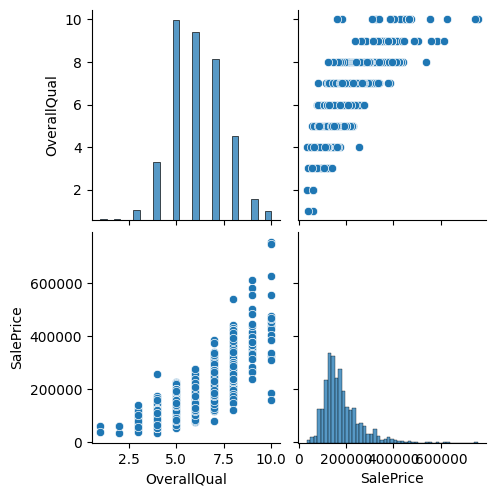

0.7909816005838044


In [6]:
plt.figure(figsize=(10,30))
sns.pairplot(df,vars=["OverallQual","SalePrice"])
plt.show()
print(df["OverallQual"].corr(df["SalePrice"]))

HeatMap of All Correlation

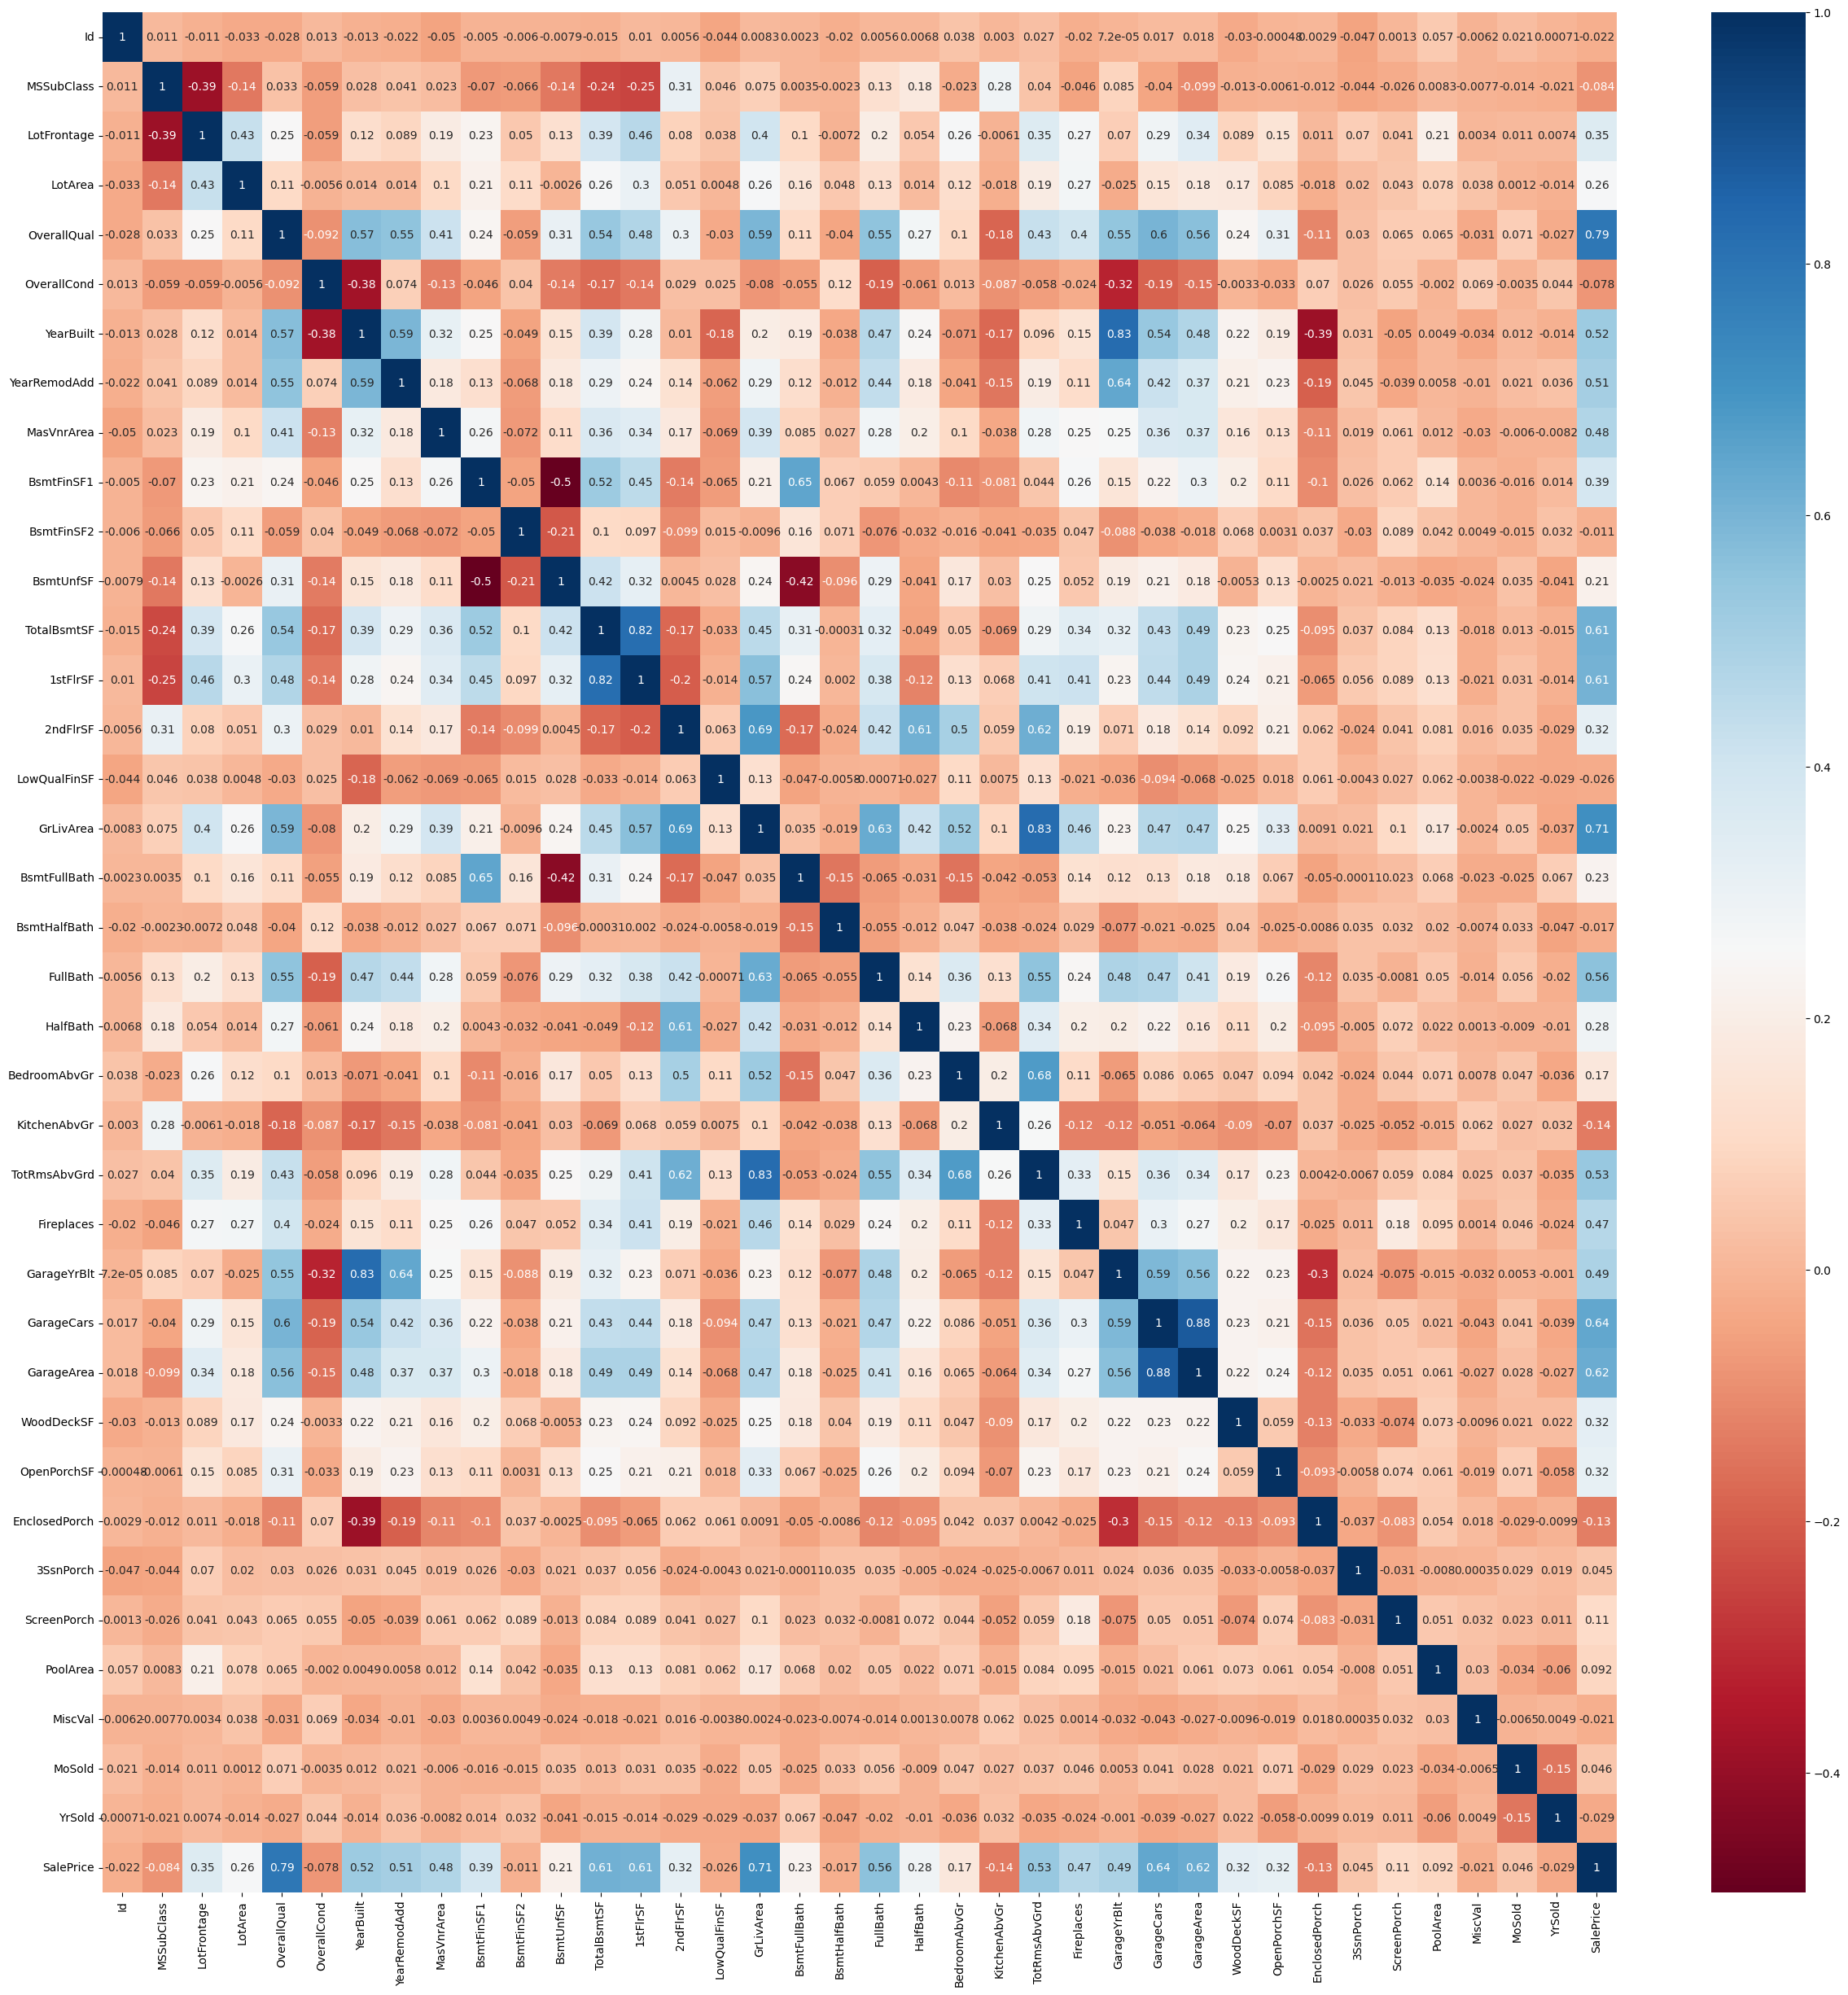

In [7]:

correlation=df.corr(numeric_only=True)
plt.figure(figsize=(30, 30))
sns.heatmap(correlation,annot=True, cmap="RdBu")
plt.show()

since this is too large refer to the one below

###heatMap of top 10 correlation of SalePrice

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


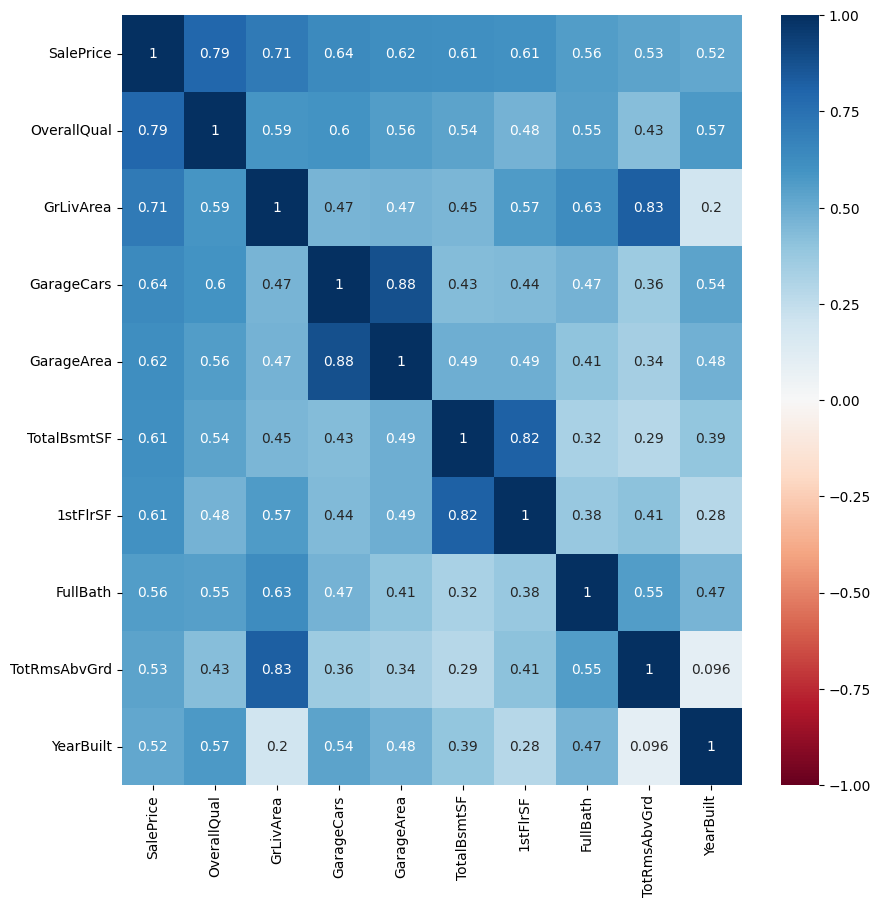

In [8]:
correlation=df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False).head(10)
print(correlation)
features = df[correlation.index]
plt.figure(figsize=(10, 10))
sns.heatmap(features.corr(),annot=True, cmap="RdBu", vmin=-1,vmax=1)
plt.show()

##Correlation Of SalePrice with other numeric Attributes

With this correlation we can say that OverallQual and SalePrice are highly correlated
other high correlations with SalePrice are attributes such as

*   GrLivArea
*   GarageCars
*   GarageArea
*   TotalBsmtSF
*   1stFlrSF

But we can do see that some features like Garagecars and garage area are infact conveying somewhat same information i.e. more garage area more cars will fit in garage. you cannot fit more no of cars in less garage area as we can see that they both directly affect the saleprice.so we do have some redundant features in our dataset


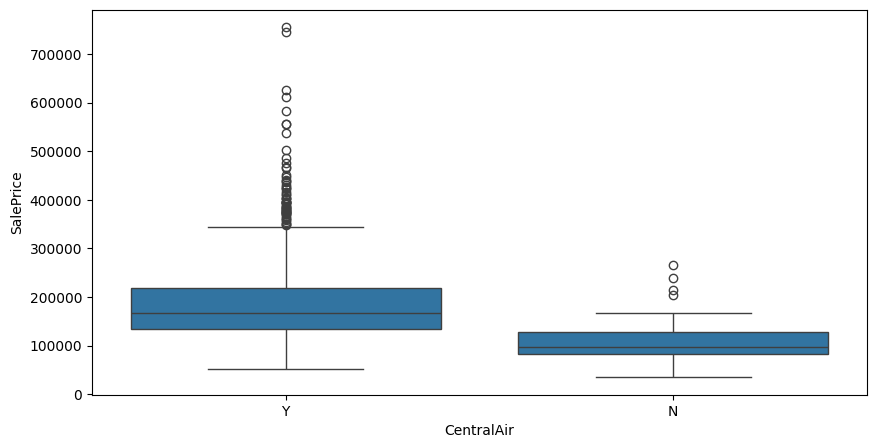

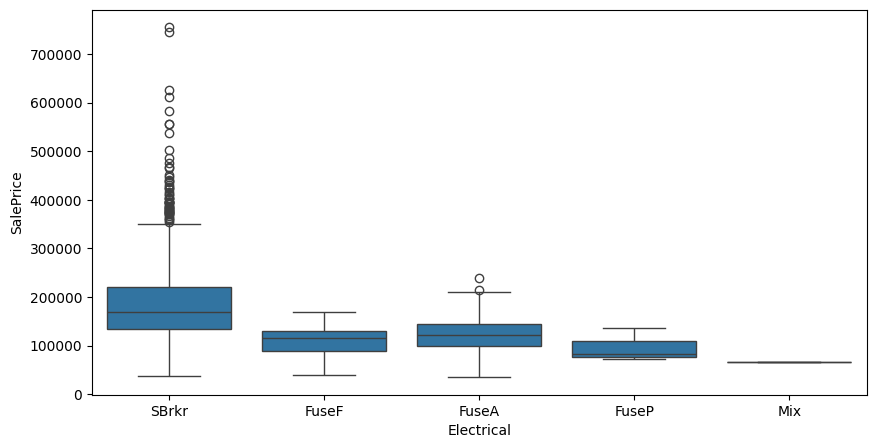

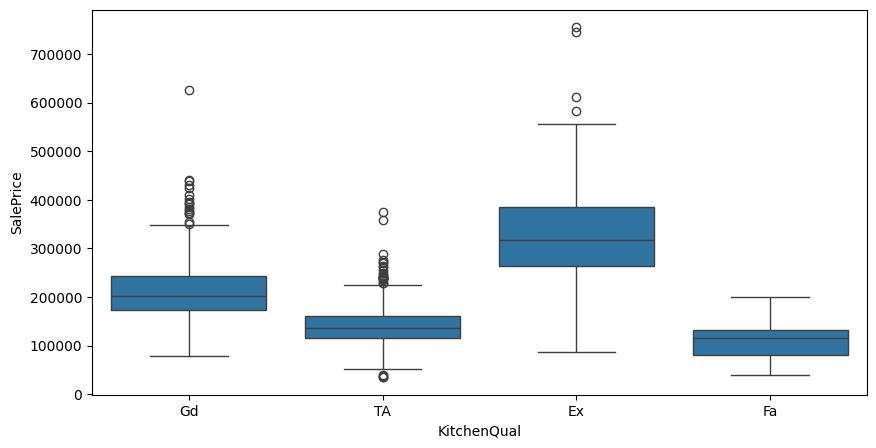

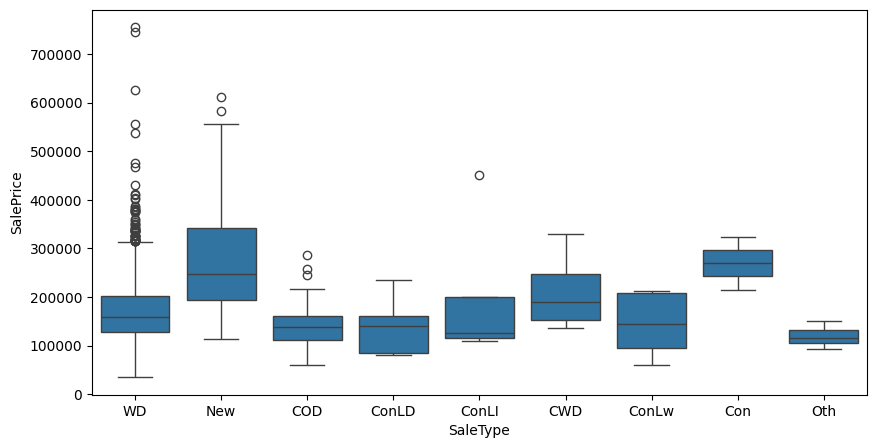

In [9]:
#CentralAir,Electrical,KitchenQual,FireplaceQu,SaleType
Attributes=["CentralAir","Electrical","KitchenQual","SaleType"]

for attribute in Attributes:
  plt.figure(figsize=(10,5))
  sns.boxplot(df,x=attribute,y="SalePrice")
  plt.show()

as we can see the graph indicates some patterns


1.  Central Air Conditioning Houses tend to have higher Sale Prices then non Central Air Conditioning Houses

2.  People prefer Standard Circuit Breakers & Romex  due to better safety and houses not having that are generally sold at low saleprice

3.  Excellent KitchenQuality have high saleprices than average or poor KitchenQuality

4.  SaleType also influences SalePrice.New houses have high SalePrice and COD have generally low SalePrice


Violin Plot of SalePrice And KitchenQual , Saleprice And OverallQual

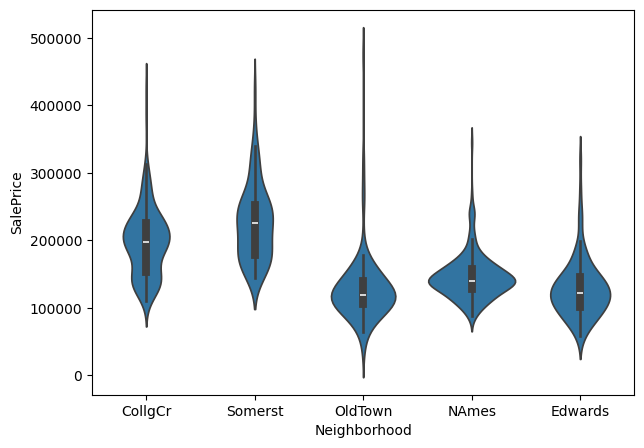

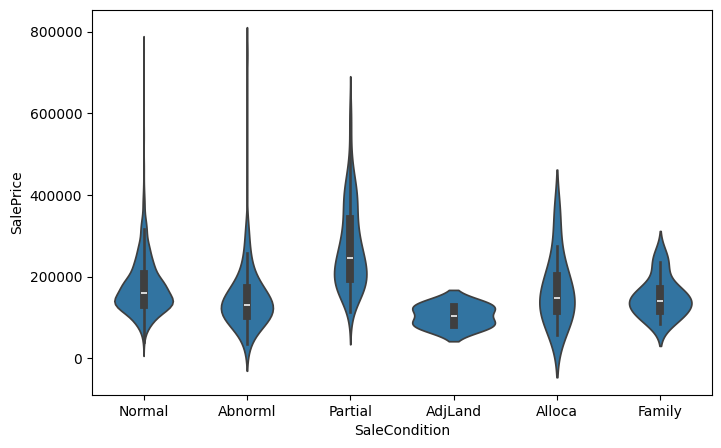

In [10]:
neighbors=df["Neighborhood"].value_counts().head(5).index
neighborhood = df[df["Neighborhood"].isin(neighbors)]
# print(df_filtered)
plt.figure(figsize=(7,5))
sns.violinplot(x="Neighborhood",y="SalePrice",data=neighborhood)
plt.show()
plt.figure(figsize=(8, 5))
sns.violinplot(x="SaleCondition",y="SalePrice",data=df)
plt.show()

Through these Graphs We can conclude that


1.   Some Neighborhood have high saleprice than other neighborhoods

2.   Sale Condition affect SalePrice.Partial SaleCondition have high SalePrice due to prebooking of new houses,Normal SaleCondition have around average SalePrice , Abnormal SaleCondition have less SalePrice than Normal SaleCondition generally

